# Data Curation and Web Scraping Project: Hamoye DSC SUMMER '22


### Project: Scraping multiple pages on Amazon's e-commerce platform for books.

>**Amazon** is a popular e-commerce platform where books are sold.In this project, we will unravel what type of books were bought frequently, between 2009 and 2019. To find this, we will juxtapose between the number of books displayed for sale, and the type of books bought frequently by consumers. 

Click [here]('https://www.amazon.com/s?k=amazon+shopping+online&rh=n%3A283155&dc&adgrpid=84486094307&gclid=CjwKCAjwwab7BRBAEiwAapqpTDYtTN8aym2q_rlYn1VdmofKw0_bzkd6xjaCl8cMY4syjbPZMKNMjxoCLIYQAvD_BwE&hvadid=393524136919&hvdev=c&hvlocphy=1010294&hvnetw=g&hvqmt=b&hvrand=2170543926145783317&hvtargid=kwd-469356929&hydadcr=22365_10729094&qid=1600780278&rnid=2941120011&tag=hydglogoo-20&ref=sr_nr_n_10')  to see Amazon's e-commerce platform for books.

In [1]:
#Importing the packages required for the analysis

import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
#Importing the libraries required to scrape the dataset.

from bs4 import BeautifulSoup
import requests
import glob
import os
os.chdir(r'\Users\Pc\Desktop\My Jupyter\Hamoye')

In [3]:
#Scraping the amazon website

def get_books(year):
    '''to get the top 30 books for each year'''
        
    url =f"https://www.amazon.com/gp/bestsellers/{year}/books"

    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
               "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",
               "Accept-Encoding":"gzip, deflate",
               "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", 
               "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    page = requests.get(url,headers = headers)
    soup =BeautifulSoup(page.content, 'html.parser')

    #get all books

    books = soup.find_all(id = 'gridItemRoot')
    
    return books

In [4]:
#Extracting nescessary information from the website

def get_dir(book,year): 
    '''to get the details of each book for each''' 
    
    import numpy as np
    '''to get the name of price'''

    try:
        price = book.find('span',class_="_cDEzb_p13n-sc-price_3mJ9Z").text[1:]
    except Exception as e:
        price = np.nan
    try:
        ranks = book.find('span', class_='zg-bdg-text').text[1:]
    except Exception as e:
        ranks = np.nan
    try:
        title = book.find('div',class_="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y").text
    except Exception as e:
        title = np.nan
    try:
        ratings= book.find('span',class_="a-icon-alt").text[:3] 
    except Exception as e:
        ratings = np.nan
    try:
        no_of_reviews  = book.find('span',class_="a-size-small").text
    except Exception as e:
        no_of_reviews = np.nan
    try:
        author = book.find('a',class_="a-size-small a-link-child").text
    except Exception as e:
        author = np.nan
    year = year
    return [price,ranks,title,no_of_reviews,ratings,author, year]

In [5]:
def get_data(books, year):
    '''to get a list of dictionary for details of each book for the top_30 books'''
    data = [get_dir(book,year) for book in books]
    return data

In [6]:
def get_dict(data,year):
    '''to get a list of dictionaries for the top_30 books for each year'''

    df_list = []       

    for book in data:

        df_list.append( {'year': book[6],
                         'price':book[0],
                         'ranks':book[1],
                         'title':book[2],
                         'no_of_reviews':book[3],
                         'ratings':book[4],
                         'author':book[5]})
    return df_list

In [7]:
def df(year):
    y = get_dict(get_data(get_books(year),year), year)
    return y

In [8]:
#Getting data for the years 2009 to 2019

years = [str(i) for i in range(2009,2020)]
for year in years:
    data = pd.DataFrame(df(year), columns = ['year',
                             'price',
                             'ranks',
                             'title',
                             'no_of_reviews',
                             'ratings',
                             'author'])
    
    data.to_csv(f'{year}_top30_books.csv')

In [9]:
#Combining all data into one single file

master_df = pd.DataFrame()

for file in os.listdir(os.getcwd()) :
    if file.endswith('.csv') :
        master_df = master_df.append(pd.read_csv(file))
        
master_df.to_csv('Amazon book data.csv', index= False)

C:\Users\Pc\AppData\Local\Temp\ipykernel_8612\1486731357.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(pd.read_csv(file))
C:\Users\Pc\AppData\Local\Temp\ipykernel_8612\1486731357.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(pd.read_csv(file))
C:\Users\Pc\AppData\Local\Temp\ipykernel_8612\1486731357.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(pd.read_csv(file))
C:\Users\Pc\AppData\Local\Temp\ipykernel_8612\1486731357.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(pd.read_csv(file))
C:\Users\Pc\AppD

In [10]:
#Loading the data for analysis

df = pd.read_csv('Amazon book data.csv')
df.head()

,Unnamed: 0,year,price,ranks,title,no_of_reviews,ratings,author
0,0,2009,14.71,1,The Lost Symbol,"16,136",4.4,Dan Brown
1,1,2009,10.04,2,The Shack: Where Tragedy Confronts Eternity,"23,402",4.7,William P. Young
2,2,2009,14.98,3,Liberty and Tyranny: A Conservative Manifesto,"5,037",4.8,Mark R. Levin
3,3,2009,14.30,4,"Breaking Dawn (The Twilight Saga, Book 4)","16,930",4.7,Stephenie Meyer
4,4,2009,10.00,5,Going Rogue: An American Life,"1,572",4.6,Sarah Palin


In [11]:
df.shape

(330, 8)

There are 330 rows in this data as expected from the 30 rows over 11 years ie from 2009 to 2019

In [12]:
df.columns

Index(['Unnamed: 0', 'year', 'price', 'ranks', 'title', 'no_of_reviews',
       'ratings', 'author'],
      dtype='object')

There is a column that is not needed and we will drop that.

In [13]:
df.drop(df.columns[[0]], axis=1, inplace= True)
df

,year,price,ranks,title,no_of_reviews,ratings,author
0,2009,14.71,1,The Lost Symbol,"16,136",4.4,Dan Brown
1,2009,10.04,2,The Shack: Where Tragedy Confronts Eternity,"23,402",4.7,William P. Young
2,2009,14.98,3,Liberty and Tyranny: A Conservative Manifesto,"5,037",4.8,Mark R. Levin
3,2009,14.30,4,"Breaking Dawn (The Twilight Saga, Book 4)","16,930",4.7,Stephenie Meyer
4,2009,10.00,5,Going Rogue: An American Life,"1,572",4.6,Sarah Palin
...,...,...,...,...,...,...,...
325,2019,17.44,26,Howard Stern Comes Again,"7,962",4.5,Howard Stern
326,2019,5.90,27,Guts: A Graphic Novel,"13,995",4.8,Raina Telgemeier
327,2019,8.32,28,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondō,4.5,NaN
328,2019,21.52,29,Harry Potter and the Goblet of Fire: The Illus...,"24,906",4.9,J. K. Rowling


The unnamed column has been dropped.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           330 non-null    int64  
 1   price          321 non-null    float64
 2   ranks          330 non-null    int64  
 3   title          329 non-null    object 
 4   no_of_reviews  330 non-null    object 
 5   ratings        330 non-null    float64
 6   author         288 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.2+ KB


In [15]:
df.isna().any()

year             False
price             True
ranks            False
title             True
no_of_reviews    False
ratings          False
author            True
dtype: bool

There are some null values is the price, title and author columns.

In [16]:
df['author'].nunique()

140

There are 140 distinct authors in the dataset. This could mean that some authors made it to the top 30 more that once over the course of the 11 years and/or records for some authors are missing.

In [17]:
df['no_of_reviews'] = df['no_of_reviews'].replace(',', '')
df

,year,price,ranks,title,no_of_reviews,ratings,author
0,2009,14.71,1,The Lost Symbol,"16,136",4.4,Dan Brown
1,2009,10.04,2,The Shack: Where Tragedy Confronts Eternity,"23,402",4.7,William P. Young
2,2009,14.98,3,Liberty and Tyranny: A Conservative Manifesto,"5,037",4.8,Mark R. Levin
3,2009,14.30,4,"Breaking Dawn (The Twilight Saga, Book 4)","16,930",4.7,Stephenie Meyer
4,2009,10.00,5,Going Rogue: An American Life,"1,572",4.6,Sarah Palin
...,...,...,...,...,...,...,...
325,2019,17.44,26,Howard Stern Comes Again,"7,962",4.5,Howard Stern
326,2019,5.90,27,Guts: A Graphic Novel,"13,995",4.8,Raina Telgemeier
327,2019,8.32,28,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondō,4.5,NaN
328,2019,21.52,29,Harry Potter and the Goblet of Fire: The Illus...,"24,906",4.9,J. K. Rowling


So let's get some insights from the dataset.

In [18]:
viz1 = df.groupby('year')['ratings'].mean()
print(viz1)

year
2009    4.613333
2010    4.596667
2011    4.630000
2012    4.540000
2013    4.576667
2014    4.656667
2015    4.616667
2016    4.656667
2017    4.653333
2018    4.693333
2019    4.776667
Name: ratings, dtype: float64


We can see that there is an overall increase in the average rating from 2009 to 2019, although, there was some slight fluctuations along the line. 

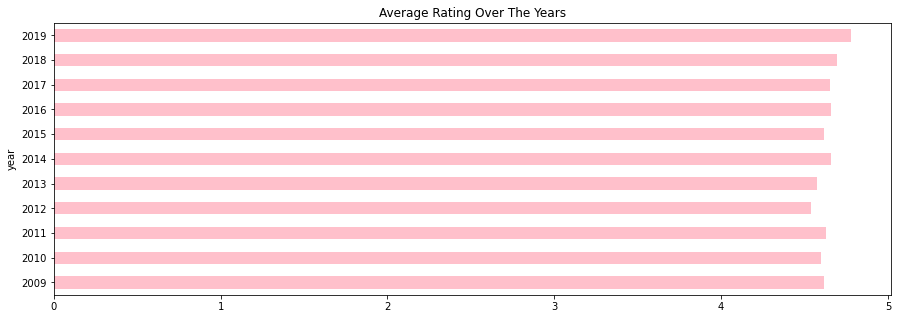

In [19]:
viz1.plot(kind='barh',title='Average Rating Over The Years', color='pink', figsize=[15,5]);

In [20]:
viz2 = df.groupby('year')['price'].mean()
print(viz2)

year
2009    19.492069
2010    15.163667
2011    17.673000
2012    18.001667
2013    21.214286
2014    18.619231
2015    10.540000
2016    10.797241
2017    10.102414
2018    11.457667
2019    10.445333
Name: price, dtype: float64


The change in price over the years does not follow a regular pattern but there was a drastic decrease in the average price from 2009 to 2019. The highest average price of books was seen in 2013.

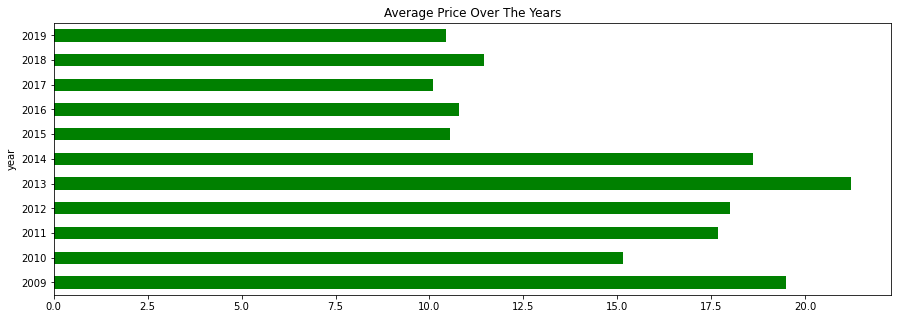

In [21]:
viz2.plot(kind='barh',title='Average Price Over The Years', color='green', figsize=[15,5]);

In [22]:
viz3 = df.groupby('author')['ratings'].mean().sort_values(ascending= False)
print(viz3)

author
Eric Carle        4.900000
Rush Limbaugh     4.900000
Dav Pilkey        4.900000
Deborah Diesen    4.900000
Sarah Young       4.900000
                    ...   
Michael Wolff     4.200000
J.K. Rowling      4.133333
Gillian Flynn     4.100000
Paula Hawkins     4.100000
Donna Tartt       4.000000
Name: ratings, Length: 140, dtype: float64


The above result asserts that the highest rating is 4.9 and the least rating of books that made it to the top 30 is 4.0

In [23]:
viz3 = df.groupby('author')['ratings'].mean().nlargest(15)
print(viz3)

author
Alice Schertle           4.900000
Dav Pilkey               4.900000
Deborah Diesen           4.900000
Dr. Seuss                4.900000
Emily Winfield Martin    4.900000
Eric Carle               4.900000
J. K. Rowling            4.900000
Jill Twiss               4.900000
Lin-Manuel Miranda       4.900000
Rush Limbaugh            4.900000
Sarah Young              4.900000
Mark R. Levin            4.850000
Brandon Stanton          4.833333
Adam Mansbach            4.800000
Adir Levy                4.800000
Name: ratings, dtype: float64


In [24]:
viz4 = df.groupby('title')['ratings'].mean().nlargest(25)
print(viz4)

title
D&D Player’s Handbook (Dungeons & Dragons Core Rulebook)                                                                   4.9
Dog Man: Brawl of the Wild: From the Creator of Captain Underpants (Dog Man #6)                                            4.9
Dog Man: Fetch-22: From the Creator of Captain Underpants (Dog Man #8)                                                     4.9
Dog Man: For Whom the Ball Rolls: From the Creator of Captain Underpants (Dog Man #7)                                      4.9
Dog Man: Lord of the Fleas: From the Creator of Captain Underpants (Dog Man #5)                                            4.9
Hamilton: The Revolution                                                                                                   4.9
Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (Illustrated edition) (4)              4.9
Humans of New York : Stories                                                                             

In [26]:
viz5 = df.groupby('title')['ratings'].mean().nsmallest(25)
print(viz5)

title
The Casual Vacancy                                                                              3.4
Go Set a Watchman: A Novel                                                                      3.7
Allegiant                                                                                       3.9
Fifty Shades Of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades Of Grey Series, 1)     4.0
The Goldfinch: A Novel (Pulitzer Prize for Fiction)                                             4.0
Gone Girl                                                                                       4.1
StrengthsFinder 2.0                                                                             4.1
The Girl on the Train                                                                           4.1
Fire and Fury: Inside the Trump White House                                                     4.2
Inferno                                                                                       

In [27]:
viz6 = df.groupby('author')['title'].value_counts().nlargest(10)
print(viz6)

author                              title                                                                            
Dr. Seuss                           Oh, the Places You'll Go!                                                            7
American Psychological Association  Publication Manual of the American Psychological Association, 6th Edition            6
Gary Chapman                        The 5 Love Languages: The Secret to Love that Lasts                                  5
Don Miguel Ruiz                     The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)    4
Gary Chapman                        The 5 Love Languages: The Secret to Love That Lasts                                  4
Giles Andreae                       Giraffes Can't Dance                                                                 4
Laura Hillenbrand                   Unbroken: A World War II Story of Survival, Resilience, and Redemption               4
Rob Elliott          

Dr Seuss' Oh, the Places You'll Go! made it to the top 30 list seven(7) times, the book must be really worth it, you should check it out.
Other books that made it to the top 30 list frequently and their authors can be seen above.

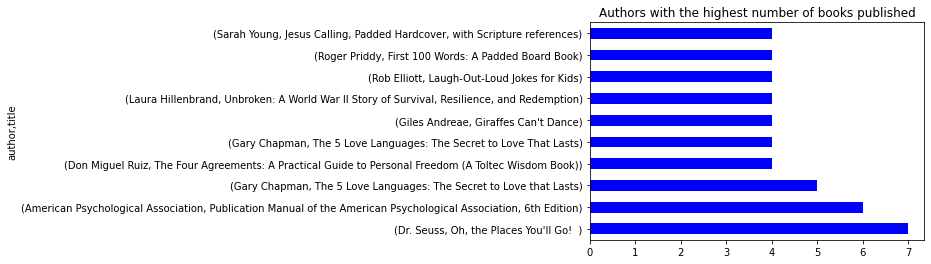

In [28]:
viz6.plot(kind='barh',title='Authors with the highest number of books published', color='blue');

In [29]:
viz7 = df['title'].value_counts().nlargest(10)
print(viz7)

StrengthsFinder 2.0                                                                  9
Oh, the Places You'll Go!                                                            7
Publication Manual of the American Psychological Association, 6th Edition            6
The 5 Love Languages: The Secret to Love that Lasts                                  5
The Official SAT Study Guide                                                         5
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)    4
Unbroken: A World War II Story of Survival, Resilience, and Redemption               4
The 5 Love Languages: The Secret to Love That Lasts                                  4
Laugh-Out-Loud Jokes for Kids                                                        4
First 100 Words: A Padded Board Book                                                 4
Name: title, dtype: int64


There's another book that has the most occurrence over the years. But the author is not known, that is why it didn't show up in the first list.

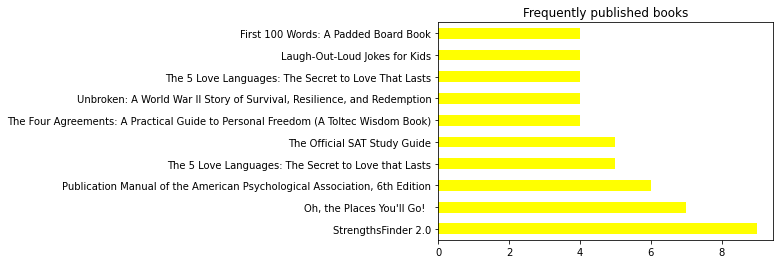

In [30]:
viz7.plot(kind='barh',title='Frequently published books', color='yellow');

In [31]:
viz8 = df.groupby('title')['price'].mean().nlargest(15)
print(viz8)

title
Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5                            144.99
Sookie Stackhouse                                                                                     82.03
The Twilight Saga Collection                                                                          59.23
Game of Thrones Boxed Set: A Game of Thrones/A Clash of Kings/A Storm of Swords/A Feast for Crows     54.98
The Official SAT Study Guide                                                                          41.47
The Hunger Games Trilogy Boxed Set                                                                    40.59
The Legend of Zelda: Hyrule Historia                                                                  32.00
Under the Dome: A Novel                                                                               30.46
Mastering the Art of French Cooking, Volume I: 50th Anniversary Edition: A Cookbook                   28.49
Fear: Trump in the Whi

The book titled 'Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5' has the highest average price.

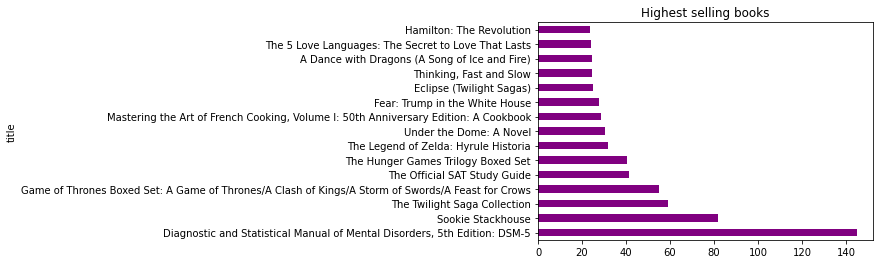

In [32]:
viz8.plot(kind='barh',title='Highest selling books', color='purple');

In [33]:
viz9 = df.groupby('title')['price'].mean().nsmallest(15)
print(viz9)

title
The Going-To-Bed Book                                                                                                  3.97
If Animals Kissed Good Night                                                                                           4.14
Knock-Knock Jokes for Kids (Laugh-Out-Loud Jokes for Kids)                                                             4.44
First 100 Words: A Padded Board Book                                                                                   4.78
The Very Hungry Caterpillar                                                                                            4.93
Laugh-Out-Loud Jokes for Kids                                                                                          4.99
Dear Zoo: A Lift-the-Flap Book                                                                                         5.00
The Pout-Pout Fish                                                                                                     5.00
Th

The book titled 'Wheat Belly: Lose the Wheat, Lose the Weight, and Find Your Path Back to Health' has the least average price in the dataset.

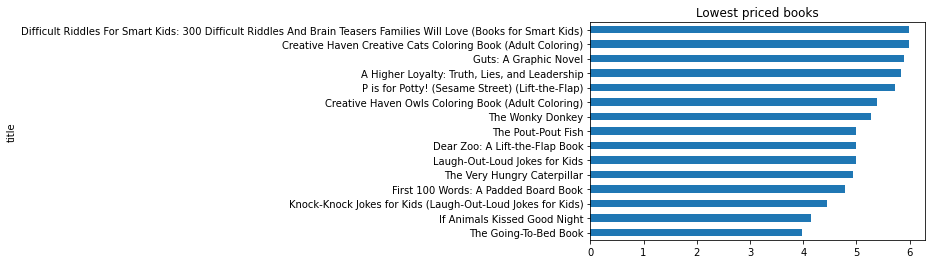

In [34]:
viz9.plot(kind='barh',title='Lowest priced books');

With the few visualizations and insights above, we've been able to establish some facts and figures from the dataset such as; 
> Average book ratings 
>
> Average price
>
> Authors with the highest and lowest ratings
>
> Books with the highest and lowest ratings
>
> Books and authors that frequently made it to the top 30 list
>
> Books with the higesht and lowest average price.